![](img/shark.png)

# Global Shark Attack

Fecha de entrega: _23:59 05/04/2021_ 

### ¿En qué consiste este mini-proyecto?

El objetivo de este mini-proyecto es que os enfrentéis a realizar un Exploratory Data Analysis por primera vez, antes del proyecto EDA. 

Durante este mini-proyecto deberás poner en práctica todo lo aprendido durante las últimas semanas. Tanto cómo te haga falta y solo si te hace falta. Esta vez serás tú el qué tome la decisión de qué tratamientos o limpiezas y visualizaciones serán mejor para tratar tus datos. 

Mínimo deberás importar las siguientes librerías, aunque te animo a explorar otras librerías nuevas.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
```

Todo esto con el fin de poder verificar nuestra hipótesis. Sigue leyendo para más información.

### Dataset

El dataset que utilizaremos para este mini-proyecto contiene datos sobre los ataques de tiburones en el mundo: localicación, fechas, tipología, especie causante, información sobre las víctimas, etc.. 

Registrado por http://www.sharkattackfile.net/index.htm.

Te lo podrás descargar en este enlace: https://www.kaggle.com/teajay/global-shark-attacks

### Hipótesis
Elige una o varias de estas hipótesis para desarrollar tu mini proyecto.

Siéntete libre de establecer nuevas hipótesis que puedas validar o rechazar con tu análisis.

- El número de supervivientes ha aumentado con el paso de los años
- Todos los ataques producidos en la India, ocurren a primera hora de la mañana
- La mayoría de los ataques en los últimos 200 años tuvieron lugar en USA, Australia y Sudáfrica. 
- Las actividades con más riesgo de sufrir un ataque de tiburon son pescar y nadar. 
- La mayoría de los ataques de tiburón fueron fatales.
- Los tiburones tienen especial predilección por los surferos.
- Reunion Island es el lugar del mundo donde ocurren más ataques de tiburón en terminos relativos.
- En Sudáfrica hay más ataques letales a mujeres que en Australia.

### Github*
*_Este punto es opcional pero MUY recomendable, ya que en el Proyecto de EDA será obligatorio_

Crea un repositorio nuevo para guardar los archivos que necesites.

Sigue la siguiente estructuras de carpetas:

    - src -> aquí encontrarás el código, en este caso los notebooks que uses
    - input -> aquí guardarás el dataset que utilices
    - output -> aquí guardarás gráficas o datasets limpios, si los tuvieras

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style = 'ticks')
plt.style.use('fivethirtyeight')

## 0. Hipótesis y primer análisis

Las hipótesis que se van a tratar de refutar/validar son las siguientes:
* Todos los ataques producidos en la India, ocurren a primera hora de la mañana.
* Las actividades con más riesgo de sufrir un ataque de tiburón son pescar o nadar
* La mayoría de los ataques de tiburón fueron fatales.
* Reunion Island es el lugar del mundo donde ocurren más ataques de tiburón en terminos relativos.
* Los tiburones tienen especial predilección por los surferos

In [2]:
sharks = pd.read_csv('../input/attacks.csv',encoding = "ISO-8859-1")
sharks.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [3]:
# Con qué datos contamos??
sharks.describe()

,Year,original order
count,6300.000000,6309.000000
mean,1927.272381,3155.999683
std,281.116308,1821.396206
min,0.000000,2.000000
25%,1942.000000,1579.000000
50%,1977.000000,3156.000000
75%,2005.000000,4733.000000
max,2018.000000,6310.000000


In [4]:
print("DataFrame shape:", sharks.shape, '\n')
print("DataFrame info:",sharks.info(), '\n')
print("DataFrame Columns:", sharks.columns, '\n')
print("type of each column:", sharks.dtypes, '\n')
print("Missing values in every colum", sharks.isna().sum())

DataFrame shape: (25723, 24) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species

Puede verse en los resultados de la celda anteriro que hay bastantes nulos en el DataFrame, así que, antes de hacer nada, lo primero es limpiarlo

## 1. Limpieza del DataFrame
Observando los resultados, se vaa a proceder de la siguiente manera:
* Las columnas `Unnamed: 22` y `Unnamed: 23` se eliminan completamente del data set por no aportar valor ninguno.
* También hay columnas como `Age`, `Time`, `Species` que tienen bastantes nulos (comparándolo con el resto de columnas)
* Se eliminarán los registros con nulos a lo largo de toda la fila (si exiten)
* Se comprobará que no hay duplicados

In [5]:
#Eliminar las dos últimas columnas
sharks = sharks.loc[:, 'Date': 'original order']
sharks.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [6]:
#Limpieza de los registros sin datos
print("Antes de limpiar los registros sin datos el tamaño del DataFrame es:",sharks.shape, "\n")
print("Después de limpiar los registros el tamaño del Dataframe es:",sharks.dropna(how='all').shape, "\n")
print('Se ha eliminado', sharks.shape[0] - sharks.dropna(how='all').shape[0], 'filas')

Antes de limpiar los registros sin datos el tamaño del DataFrame es: (25723, 21) 

Después de limpiar los registros el tamaño del Dataframe es: (6309, 21) 

Se ha eliminado 19414 filas


Como se puede ver, se han eliminado 19414 filas que no contenían datos, por ello, se procede a realizar un cambio permanente con 'inplace', y se guardará ese dataframe en un nuevo csv para poder realizar tratamientos posteriores. Pero antes, continuamos con la limpieza.

In [7]:
df_sharks = sharks.dropna(how='all')

In [8]:
df_sharks.tail(20)

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
6289,No date (3 days after preceding incident) & pr...,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Fishing,a native fisherman,M,NaN,...,Y,NaN,NaN,"Rural New Yorker, 7/19/1913",ND-0013-Durban-native-fisherman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0013,ND.0013,14.0
6290,Before 19-Jul-1913,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Wading,a young Scotsman,M,NaN,...,Y,NaN,NaN,"Rural New Yorker, 7/19/1913",ND-0012-Durban-Scotsman.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0012,ND.0012,13.0
6291,Before 1911,0.0,Unprovoked,ASIA?,NaN,NaN,Swimming,Mr. Masury,M,NaN,...,N,NaN,NaN,"Ref. J. T. Dubois in N.Y. Sun, 3/19/1911",ND-0011-Masury.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0011,ND.0011,12.0
6292,Circa 1862,0.0,Unprovoked,USA,Hawaii,Puna,NaN,"A ""chiefess""",F,NaN,...,N,NaN,NaN,Captain W. Young,ND-0010-Puna Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0010,ND.0010,11.0
6293,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,boy,M,NaN,...,Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0009-boy-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0009,ND.0009,10.0
6294,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,...,Y,NaN,Blue pointer,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0008-Fisherman2-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0008,ND.0008,9.0
6295,Before 1906,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Fishing,fisherman,M,NaN,...,Y,NaN,Blue pointers,"NY Sun, 9/9/1906, referring to account by Loui...",ND-0007 - Fisherman-Australia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0007,ND.0007,8.0
6296,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,Swimming,Arab boy,M,NaN,...,Y,NaN,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz...",ND-0006-ArabBoy-Prymount.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0006,ND.0006,7.0
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0


In [19]:
df_sharks.loc[:,'Age':'Fatal (Y/N)']

,Age,Injury,Fatal (Y/N)
0,57,"No injury to occupant, outrigger canoe and pad...",N
1,11,Minor injury to left thigh,N
2,48,Injury to left lower leg from surfboard skeg,N
3,NaN,Minor injury to lower leg,N
4,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N
...,...,...,...
6304,NaN,NaN,NaN
6305,NaN,NaN,NaN
6306,NaN,NaN,NaN
6307,NaN,NaN,NaN


Viendo el DataFrame como está, se puede ver que una gran parte de las últimas filas (7) contienen muchos nulos.

Por eso aplico un 'thresh' a este DataFrame.

Existen 21 columnas, de manera que eliminaré los registros que solo tengan 2 valores no nulos. Esto supone algo menos de un 10% de valores no nulos en cada registro, y serán considerados como no nulos. En otras palabras, para considerar un registro (caso) como válido para poder realizar comparaciones, deberá contar con almenos, el 10% de la información máxima que aporta el DataFrame.

In [24]:
clean_sharks = df_sharks.dropna(thresh=2)

In [25]:
clean_sharks

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6298,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6299,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6300,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,Y,NaN,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


Antes de guardarlo en un csv, vulvo a analizar los datos:

Text(0.5, 1.0, 'Missing Data')

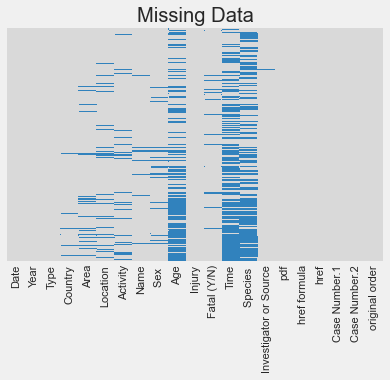

In [27]:
sns.heatmap(clean_sharks.isnull(), yticklabels=False, cbar = False, cmap='tab20c_r')
plt.title('Missing Data')

Finalizo este apartado creando un nuevo csv que utilizaré para el análisis.

In [29]:
clean_sharks.to_csv('../output/attacks_cleaned.csv', index=False)

## 2. Análisis de los datos

Como se mencionó en el [*apartado 0*](#0.-Hipótesis-y-primer-análisis) son las siguientes:
* Todos los ataques producidos en la India, ocurren a primera hora de la mañana.
* Las actividades con más riesgo de sufrir un ataque de tiburón son pescar o nadar
* La mayoría de los ataques de tiburón fueron fatales.
* Reunion Island es el lugar del mundo donde ocurren más ataques de tiburón en terminos relativos.
* Los tiburones tienen especial predilección por los surferos

In [32]:
# Importo el dataframe
df_attacks = pd.read_csv('../output/attacks_cleaned.csv')
df_attacks.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


### 2.1. Todos los ataques producidos en la India, ocurren a primera hora de la mañana

In [52]:
print("Ataques registrados en la India:", df_attacks.loc[df_attacks['Country']=='INDIA', ['Time']].shape[0])
print("Casos que no han registrado la hora del ataque:", df_attacks.loc[df_attacks['Country']=='INDIA', ['Time']].isnull().sum()[0])
df_attacks.loc[(df_attacks['Country']=='INDIA') & (df_attacks['Time']!='NaN'), ['Time']].dropna()

Ataques registrados en la India: 40
Casos que no han registrado la hora del ataque: 32


,Time
5104,13h00
5818,11h00
5821,12h00
5822,10h00
5922,Before 10h30
6090,Evening
6091,17h00-18h00
6113,Evening


Con la tabla mostrada anteriormente, se puede refutar la hipótesis fácilmente sin necesidad de gráficos.

Además, la hipótesis afirmaba que 'TODOS' los ataques se producían a primera hora de la mañana, de manera que con un único caso que no ocurriera a esa hora, negaría la hipótesis.

### 2.2. Las actividades con más riesgo de sufrir un ataque de tiburón son pescar o nadar

In [66]:
activity_df = df_attacks[['Activity','original order']].groupby('Activity').count().sort_values(by = 'original order', ascending = False).head(15)
activity_df

,original order
Activity,
Surfing,971
Swimming,869
Fishing,431
Spearfishing,333
Bathing,162
Wading,149
Diving,127
Standing,99
Snorkeling,89


<Figure size 0x0 with 0 Axes>

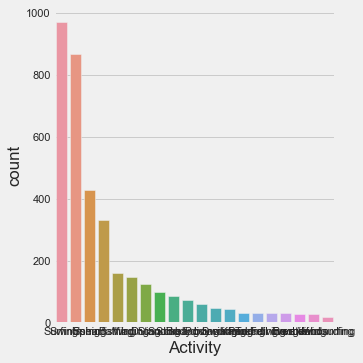

In [87]:
plt.figure(figsize=(0,0))
sns.catplot(x = 'Activity',data = df_attacks, kind = 'count', order=df_attacks.Activity.value_counts().iloc[:20].index)


### 2.3. La mayoría de los ataques de tiburón fueron fatales

### 2.4. Los tiburones tienen especial predilección por los surferos